# Importing Libraries

In [14]:
import numpy as np
import pandas as pd

In [16]:
#2
dataset1=pd.read_csv("movies.csv")
dataset1.shape

(9742, 3)

In [19]:
#3
dataset2=pd.read_csv("ratings.csv")
dataset2.shape

(100836, 4)

In [7]:
#4
unique_user_count = dataset2['userId'].nunique()

print("Number of unique userId values:", unique_user_count)

Number of unique userId values: 610


In [10]:
merged_df1= pd.merge(dataset1,dataset2, on='movieId', how='inner')

# Save the merged DataFrame to a new CSV file
merged_df1.to_csv('merged_file.csv', index=False)

In [11]:
merged_df1

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [12]:
#5
movie_ratings_count =merged_df1.groupby('movieId')['userId'].count()

# Find the movieId with the maximum number of ratings
max_ratings_movie_id = movie_ratings_count.idxmax()

# Get the movie title corresponding to the movieId with the maximum ratings
max_ratings_movie_title =merged_df1[merged_df1['movieId'] == max_ratings_movie_id]['title'].iloc[0]

print("Movie with the maximum number of ratings:")
print("Movie Title:", max_ratings_movie_title)
print("MovieId:", max_ratings_movie_id)
print("Number of Ratings:", movie_ratings_count[max_ratings_movie_id])

Movie with the maximum number of ratings:
Movie Title: Forrest Gump (1994)
MovieId: 356
Number of Ratings: 329


In [20]:
dataset3= pd.read_csv('tags.csv')
dataset3.shape

(3683, 4)

In [21]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [ ]:
#6


In [24]:
#7
# Get the movieId of "Terminator 2: Judgment Day (1991)"
movie_id = dataset1[dataset1["title"] == "Terminator 2: Judgment Day (1991)"]["movieId"].values[0]

# Filter the ratings dataframe to only include ratings for "Terminator 2: Judgment Day (1991)"
t2_ratings = dataset2[dataset2["movieId"] == movie_id]

# Calculate the average rating
average_rating = t2_ratings["rating"].mean()

# Print the result
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is 3.97


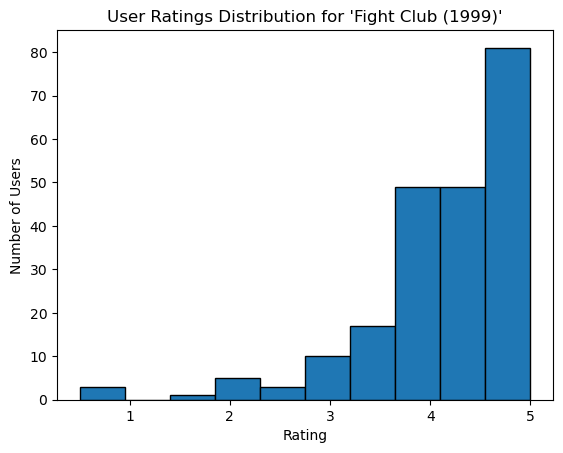

In [23]:
#8

# Get the movieId of "Fight Club (1999)"
movie_id = dataset1[dataset1["title"] == "Fight Club (1999)"]["movieId"].values[0]

# Filter the ratings dataframe to only include ratings for "Fight Club (1999)"
fc_ratings = dataset2[dataset2["movieId"] == movie_id]

# Plot the histogram of ratings
plt.hist(fc_ratings["rating"], bins=10, edgecolor="black")

# Set the title and labels
plt.title("User Ratings Distribution for 'Fight Club (1999)'")
plt.xlabel("Rating")
plt.ylabel("Number of Users")

# Show the plot
plt.show()

 As per the output the distribution is left skewed

In [ ]:
# Mandatory Operations:
   1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
   2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
   3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

   Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.


In [25]:
import pandas as pd

# Load your dataset into a DataFrame (replace 'ratings.csv' with the actual file path)
dataset1 = pd.read_csv('ratings.csv')

# Group by 'movieId' and calculate count and mean for each group
grouped_df =dataset1.groupby('movieId')['rating'].agg(['count', 'mean'])

# Reset the index to make 'movieId' a regular column
grouped_df.reset_index(inplace=True)

# Rename the columns for clarity
grouped_df.columns = ['movieId', 'rating_count', 'rating_mean']

# Display the grouped and aggregated data
print(grouped_df.head())

   movieId  rating_count  rating_mean
0        1           215     3.920930
1        2           110     3.431818
2        3            52     3.259615
3        4             7     2.357143
4        5            49     3.071429


In [27]:
# Perform an inner join on 'movieId'
result_df = pd.merge(dataset, grouped_df, on='movieId', how='inner')

# Display the resulting DataFrame
print(result_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
3                         Comedy|Drama|Romance             7     2.357143  
4                                       Comedy            49     3.071429  


In [28]:
filtered_movies = result_df[result_df['rating_count'] > 50]

# Display the filtered DataFrame
print(filtered_movies.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


In [29]:
filtered_movies

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [30]:
#1
sorted_movies = filtered_movies.sort_values(by='rating_mean', ascending=False)

# Display the most popular movie
most_popular_movie = sorted_movies.iloc[0]
print("Most popular movie based on average user ratings:")
print(most_popular_movie[['movieId', 'title', 'rating_mean']])

Most popular movie based on average user ratings:
movieId                                     318
title          Shawshank Redemption, The (1994)
rating_mean                            4.429022
Name: 277, dtype: object


In [31]:
#2
top5_popular_movies = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)

# Display the top 5 popular movies
print("Top 5 popular movies based on the number of user ratings:")
print(top5_popular_movies[['movieId', 'title', 'rating_count']])

Top 5 popular movies based on the number of user ratings:
      movieId                             title  rating_count
314       356               Forrest Gump (1994)           329
277       318  Shawshank Redemption, The (1994)           317
257       296               Pulp Fiction (1994)           307
510       593  Silence of the Lambs, The (1991)           279
1938     2571                Matrix, The (1999)           278


In [37]:
#3
scifi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

# Sort Sci-Fi movies by the number of user ratings in descending order
sorted_scifi_movies = scifi_movies.sort_values(by='rating_count', ascending=False)

# Display the third most popular Sci-Fi movie
third_most_popular_scifi_movie = sorted_scifi_movies.iloc[2]
print("Third most popular Sci-Fi movie based on the number of user ratings:")
print(third_most_popular_scifi_movie[['movieId', 'title', 'rating_count']])

Third most popular Sci-Fi movie based on the number of user ratings:
movieId                          480
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [33]:
dataset4=pd.read_csv("links.csv")
dataset4

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [34]:
#1
# Find the movieId with the highest IMDB rating
highest_rated_movie_id =dataset4.loc[dataset4['imdbId'].idxmax(), 'movieId']

print("MovieId of the movie with the highest IMDB rating:", highest_rated_movie_id)

MovieId of the movie with the highest IMDB rating: 193587


In [ ]:
#2
movies_df = pd.read_csv('links.csv')

# Filter Sci-Fi movies
scifi_movies = movies_df[movies_df['tmdbId'].str.contains('Sci-Fi', case=False)]

# Find the movieId with the highest IMDB rating among Sci-Fi movies
highest_rated_scifi_movie_id = scifi_movies.loc[scifi_movies['imdb_rating'].idxmax(), 'movieId']

print("MovieId of the Sci-Fi movie with the highest IMDB rating:", highest_rated_scifi_movie_id)